Ejercicio 23.D
Repite el ejercicio anterior pero ahora divide los datos en entrenamiento y validación.

Para ello usa la función train_test_split de sklearn

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

El parámetro test_size indica el % de datos (en tpu) que serán para el test.

Ahora deberás indicar en el método fit que ahora hay datos de entrenamiento y de test

history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,verbose=False)

Para acabar ahora están las métricas de:
- loss : La pérdida en entrenamiento
- val_loss : La pérdida en validación

Al mostrar la gráfica, muestra tanto loss como val_loss del mismo color pero que la línea de val_loss sea continua y la línea de val_loss sea puenteada

In [13]:
import time

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from matplotlib.ticker import MultipleLocator
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

tf.keras.utils.set_random_seed(5)

In [14]:
def get_data():
    iris = load_iris()

    sepal_length = iris.data[0:99, 0]
    petal_length = iris.data[0:99, 2]
    flower_type = iris.target[0:99]

    x = np.column_stack((sepal_length, petal_length))
    y = flower_type

    return x, y

In [15]:
def plot_metrics(axe, history, title):
    axe.plot(
        history['loss'], linestyle='dotted', color="#003B80", label=f'loss entrenamiento {history["loss"][-1]:.2f}'
    )
    axe.plot(history['val_loss'], color="#003B80", label=f'loss validacion {history["val_loss"][-1]:.2f}')

    axe.set_xlabel('Nº de época', color='#003B80', fontsize=13)
    axe.xaxis.set_major_locator(MultipleLocator(5))

    axe.set_ylabel('Métricas', color='#003B80', fontsize=13)
    axe.yaxis.set_major_locator(MultipleLocator(0.1))
    axe.set_ylim(ymin=0, ymax=1.1)

    axe.set_title(title)
    axe.set_facecolor("#E3F7FA")
    axe.grid(visible=True, which='major', axis='both', color='white')
    axe.set_axisbelow(True)
    axe.legend()

In [16]:
def compile_fit(net, x, y, first_layer):
    layers = net
    model = Sequential()

    for idx, layer in enumerate(layers):
        if idx == 0:
            model.add(Dense(layer, activation='relu', input_dim=first_layer))
        elif idx == len(layers) - 1:
            model.add(Dense(layer, activation='sigmoid'))
        else:
            model.add(Dense(layer, activation='relu'))

    model.compile(loss='mean_squared_error')

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    mark1 = time.time()
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, verbose=False)
    mark2 = time.time()

    time_elapsed = mark2 - mark1

    return model, history, time_elapsed


In [17]:
X, y = get_data()

In [18]:
nets = [
    [4, 8, 4, 2, 1],
    [8, 16, 8, 4, 1],
    [16, 32, 16, 8, 1],
    [32, 64, 32, 8, 1],
    [64, 128, 64, 8, 1],
]

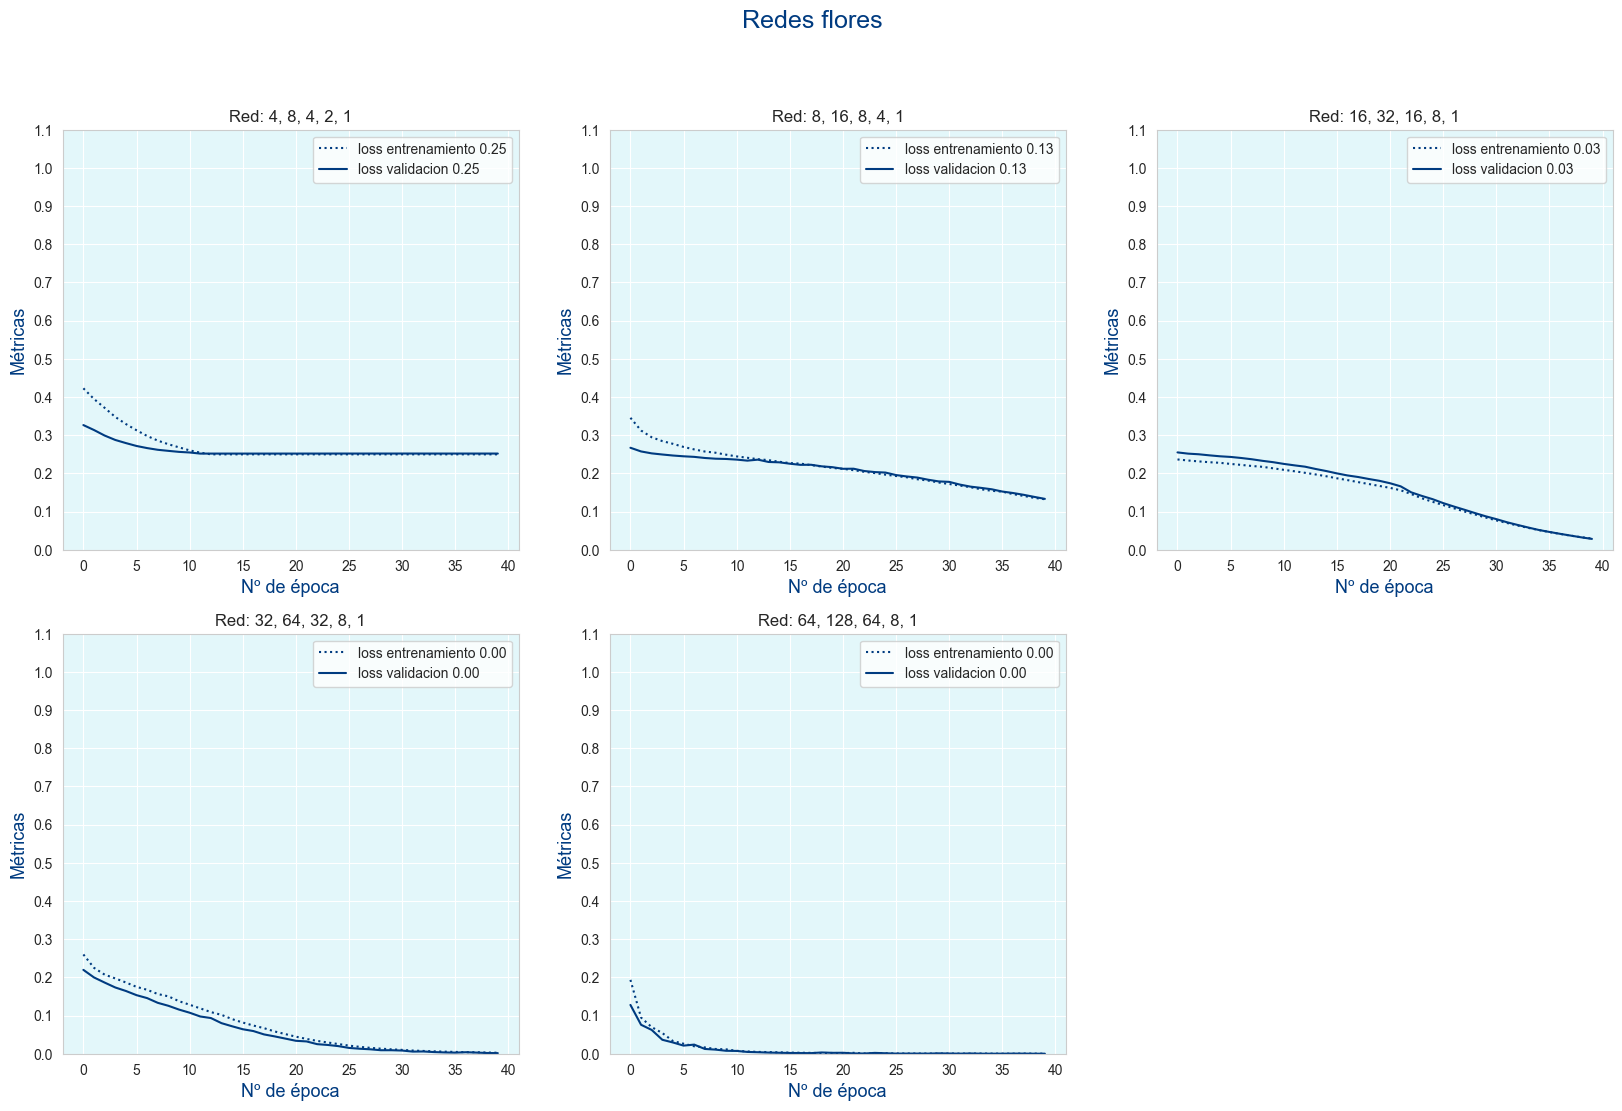

In [19]:
figure = plt.figure(figsize=(20, 12))
figure.suptitle('Redes flores', color='#003B80', fontsize=18)

for idx, net in enumerate(nets):
    axe = figure.add_subplot(2, 3, idx + 1)

    model, history, _ = compile_fit(net, X, y, X.shape[1])

    str_net = [str(x) for x in net]
    plot_metrics(axe, history.history, "Red: " + ", ".join(str_net)) 